# US State Ranking

1. http://www.businessinsider.com/us-news-best-states-quality-of-life-ranked-2018-2
2. https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

plt.style.use('ggplot')

In [198]:
mcdfraw = pd.read_csv("businessinsider.csv")
popdfraw = pd.read_csv("population.csv")

In [199]:
mc_temp = []
mc_rank = []
mc_state = []
mc_state_natural = []
mc_state_social = []

for elem in mcdfraw['State']:
    mc_temp.append(elem.split(". "))
mc_rank = np.transpose(mc_temp)[0]
mc_rank = [int(elem) for elem in mc_rank]
mc_state = np.transpose(mc_temp)[1]

mc_temp = []
for elem in mcdfraw['Natural']:
    mc_temp.append(elem.split(": "))
mc_state_natural = np.transpose(mc_temp)[1]
mc_state_natural = [int(elem) for elem in mc_state_natural]


mc_temp = []
for elem in mcdfraw['Social']:
    mc_temp.append(elem.split(": "))
mc_state_social = np.transpose(mc_temp)[1]
mc_state_social = [int(elem) for elem in mc_state_social] 

pop_temp = []
for elem in popdfraw['State']:
    pop_temp.append(elem.strip())

popdfraw['State'] = pop_temp

In [200]:
for elem in popdfraw['State']:
    popdfraw['State'].replace([elem], elem.strip())

In [201]:
mcdf_dict = {"State": mc_state, "Rank": mc_rank, "Natural": mc_state_natural, "Social": mc_state_social}
mcdf = pd.DataFrame(data=mcdf_dict)

In [208]:
mcdf = mcdf.set_index('State')
popdf = popdfraw.set_index('State')

In [209]:
popdf[popdf['PopRank']==47].index

Index(['North Dakota'], dtype='object', name='State')

In [210]:
df = pd.concat([mcdf,popdf], axis=1)

In [219]:
df.sort_values(by=['Rank'])

,Natural,Rank,Social,PopRank,Population2017,HouseSeats,PerHouseSeat,Percent
North Dakota,2,1,3,47,755393,1,755393,0.0024
Minnesota,12,2,4,22,5576606,8,697076,0.0171
Wisconsin,20,3,5,20,5795483,8,724435,0.0179
New Hampshire,13,4,7,41,1342795,2,671398,0.0041
South Dakota,6,5,14,46,869666,1,869666,0.0027
Mississippi,9,6,17,34,2984100,4,746025,0.0092
Arkansas,5,7,21,32,3004279,4,751070,0.0093
New Mexico,17,8,11,36,2088070,3,696023,0.0064
Iowa,18,9,10,30,3145711,4,786428,0.0097
Colorado,8,10,20,21,5607154,7,801022,0.0172


### Visualization

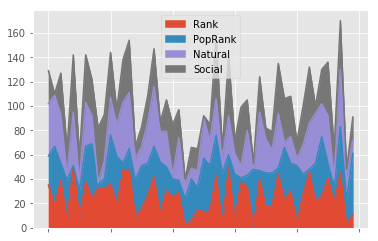

In [221]:
df[['Rank','PopRank','Natural','Social']].plot.area();

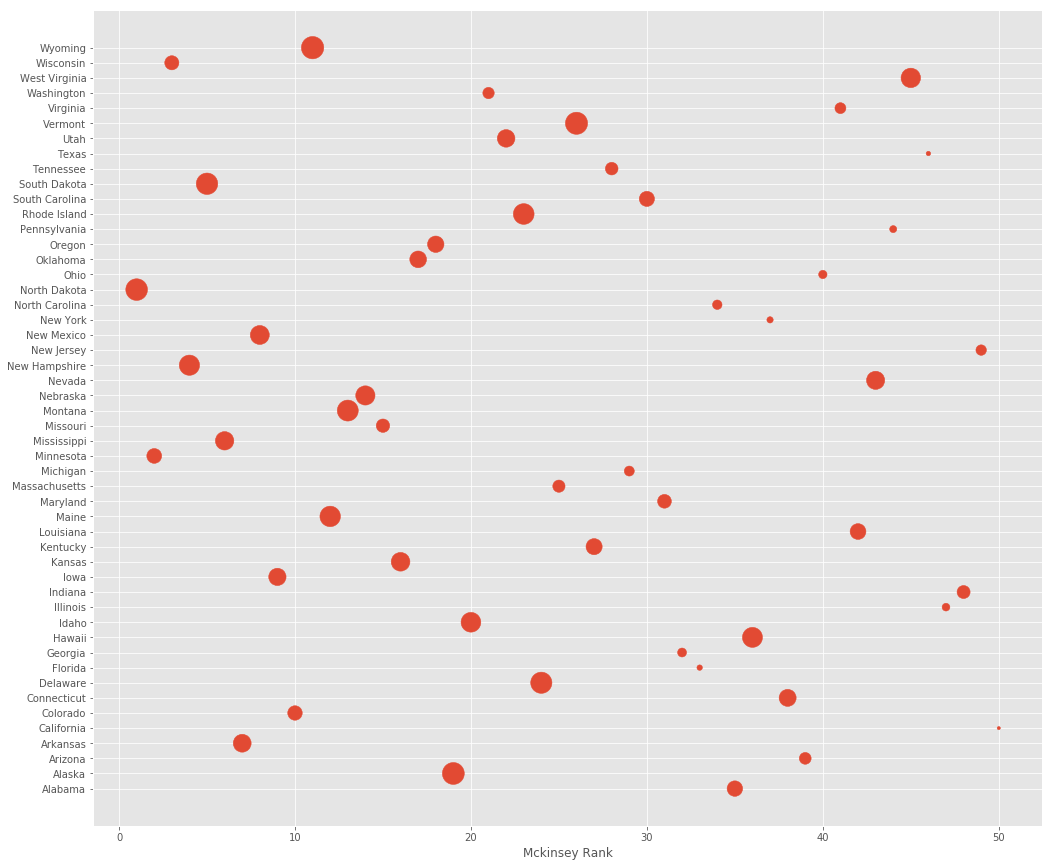

In [222]:
plt.figure(figsize=(17,15))
plt.scatter(x=df['Rank'], y=df.index.values, s=df['PopRank']*10);
plt.xlabel("Mckinsey Rank")
plt.show()